# LV1 – Obrada teksta i Part-of-Speech (POS) označavanje
### Laboratorijska vježba 1
**Tema:** Osnove obrade prirodnog jezika pomoću biblioteka spaCy i NLTK

Ovaj notebook sadrži teorijski uvod, osnovne korake obrade teksta te zadatke za samostalni rad. Studenti mogu birati žele li koristiti *spaCy* ili *NLTK* biblioteku pri rješavanju zadataka.

## Ciljevi vježbe
- Upoznati osnovne korake obrade prirodnog jezika (NLP).
- Primijeniti biblioteke **spaCy** i **NLTK** na obradu teksta.
- Razumjeti i implementirati procese tokenizacije, uklanjanja zaustavnih riječi, lematizacije i POS označavanja.
- Razviti sposobnost analize i interpretacije rezultata obrade teksta.

## 1. Instalacija potrebnih biblioteka

In [1]:
!pip install spacy nltk matplotlib pandas

!python -m spacy download en_core_web_sm

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 86.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## 2. Tokenizacija
**Opis:** Tokenizacija je proces razdvajanja teksta na manje jedinice – tokene (riječi, interpunkcijske znakove itd.).

U nastavku su prikazana dva načina tokenizacije: pomoću *spaCy* i pomoću *NLTK*.

In [2]:
nlp = spacy.load('en_core_web_sm')
text = 'Natural Language Processing enables computers to understand human language.'
doc = nlp(text)
for token in doc:
    print(token.text)

Natural
Language
Processing
enables
computers
to
understand
human
language
.


In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')
text = 'Natural Language Processing enables computers to understand human language.'
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Natural', 'Language', 'Processing', 'enables', 'computers', 'to', 'understand', 'human', 'language', '.']


### Zadatak 1
Upiši vlastiti tekst i izvrši tokenizaciju pomoću obje biblioteke.

In [4]:
nlp = spacy.load('en_core_web_sm')
text = 'Natural Language Processing enables computers to understand human language.'
doc = nlp(text)
for token in doc:
    print(token.text)

nltk.download('punkt')
nltk.download('punkt_tab')
text = 'Natural Language Processing enables computers to understand human language.'
tokens = word_tokenize(text)
print(tokens)

Natural
Language
Processing
enables
computers
to
understand
human
language
.
['Natural', 'Language', 'Processing', 'enables', 'computers', 'to', 'understand', 'human', 'language', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 3. Uklanjanje zaustavnih riječi (Stopwords)
Zaustavne riječi su česte riječi koje ne doprinose značenju teksta (npr. the, is, in...).

In [5]:
doc = nlp(text)
filtered_spacy = [token.text for token in doc if not token.is_stop]
print(filtered_spacy)

['Natural', 'Language', 'Processing', 'enables', 'computers', 'understand', 'human', 'language', '.']


In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_nltk = [word for word in tokens if word.lower() not in stop_words]
print(filtered_nltk)

['Natural', 'Language', 'Processing', 'enables', 'computers', 'understand', 'human', 'language', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Zadatak 2
Ukloni zaustavne riječi iz vlastitog teksta pomoću obje biblioteke.

## 4. Lematizacija
Lematizacija svodi riječi na osnovni oblik (lemu).

In [7]:
#Primjer: Lemmatizacija sa spaCy
for token in doc:
    print(f'{token.text:15} → {token.lemma_}')

Natural         → Natural
Language        → Language
Processing      → processing
enables         → enable
computers       → computer
to              → to
understand      → understand
human           → human
language        → language
.               → .


In [ ]:
#Primjer: Lemmatizacija s NLTK
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
pos_tags = pos_tag(tokens)
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return wordnet.NOUN
lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
print(lemmas)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


['Natural', 'Language', 'Processing', 'enable', 'computer', 'to', 'understand', 'human', 'language', '.']


[nltk_data]   Package wordnet is already up-to-date!


### Zadatak 3
Primijeni lematizaciju na vlastiti tekst i usporedi rezultate između spaCy i NLTK.

In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")

text = """
In the future, artificel intellgence will revolutionize the way we interract with technolodgy.
Peaple might use smart assistents not only for work but also for personal healtcare and educattion.
"""

doc = nlp(text)

spacy_lemmas = [token.lemma_ for token in doc if token.is_alpha]
print("spaCy lemmatization:")
print(spacy_lemmas)


spaCy lemmatization:
['in', 'the', 'future', 'artificel', 'intellgence', 'will', 'revolutionize', 'the', 'way', 'we', 'interract', 'with', 'technolodgy', 'Peaple', 'might', 'use', 'smart', 'assistent', 'not', 'only', 'for', 'work', 'but', 'also', 'for', 'personal', 'healtcare', 'and', 'educattion']


## 5. POS (Part-of-Speech) označavanje
POS označavanje dodjeljuje gramatičku ulogu svakoj riječi (imenica, glagol, pridjev, prilog...).

In [ ]:
for token in doc:
    print(f'{token.text:15} → {token.pos_:6} ({token.tag_})')

Natural         → PROPN  (NNP)
Language        → PROPN  (NNP)
Processing      → NOUN   (NN)
is              → AUX    (VBZ)
a               → DET    (DT)
fascinating     → ADJ    (JJ)
field           → NOUN   (NN)
of              → ADP    (IN)
artificial      → ADJ    (JJ)
intelligence    → NOUN   (NN)
.               → PUNCT  (.)


In [ ]:
pos_tags = pos_tag(tokens)
for word, tag in pos_tags:
    print(f'{word:15} → {tag}')

Natural         → JJ
Language        → NNP
Processing      → NNP
enables         → VBZ
computers       → NNS
to              → TO
understand      → VB
human           → JJ
language        → NN
.               → .


### Zadatak 4
Izdvoji sve imenice i glagole iz svog teksta pomoću jedne od biblioteka.

In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")

text = """
In the future, artificel intellgence will revolutionize the way we interract with technolodgy.
Peaple might use smart assistents not only for work but also for personal healtcare and educattion.
Yet, as systems become more compicated, ensuring data privasy and securrity will be crucial.
The recent blonix project already shows how mashine learning can adapt to dynamic enviroments.
"""

doc = nlp(text)

nouns = [token.text for token in doc if token.pos_ == "NOUN"]
verbs = [token.text for token in doc if token.pos_ == "VERB"]

print("NOUNS:", nouns)
print("VERBS:", verbs)


NOUNS: ['intellgence', 'way', 'assistents', 'work', 'healtcare', 'educattion', 'systems', 'data', 'privasy', 'securrity', 'blonix', 'project', 'mashine', 'learning', 'enviroments']
VERBS: ['revolutionize', 'interract', 'use', 'become', 'ensuring', 'shows', 'adapt']


## 6. Zadaci

## Zadatak 1: Usporedi dva teksta po učestalosti riječi

**Opis:**  
Analiziraj dva različita teksta (npr. jedan o sportu, drugi o tehnologiji).  
Nakon što provedeš tokenizaciju, uklanjanje zaustavnih riječi i lematizaciju, potrebno je:  
- pronaći 5 najčešćih imenica u svakom tekstu,  
- usporediti liste dobivenih imenica,  
- zaključiti o čemu se govori u svakom tekstu.

**Cilj:**  
Razumjeti kako se analiza frekvencije riječi može koristiti za prepoznavanje teme teksta.

**Upute:**  
1. Učitaj dva različita teksta (mogu biti dvije rečenice, dva odlomka ili datoteke).  
2. Obradi svaki tekst (tokenizacija → čišćenje → lematizacija → POS tagging).  
3. Izdvoji samo riječi označene kao NOUN (imenice).  
4. Prebroji pojavljivanja i prikaži 5 najčešćih.  
5. Zaključi koja je tema svakog teksta.

In [13]:
text_sport = """
The team played an intense match last night, delivering one of their strongest performances this season.
Throughout the match, the team demonstrated exceptional teamwork, discipline, and determination.
The coach repeatedly emphasized how important teamwork was for maintaining control during the most difficult moments of the match.
Several players mentioned that the team had trained specifically to improve their teamwork and communication, which clearly paid off.
Fans celebrated loudly after the match, recognizing that the team’s victory was crucial for improving their position in the championship.
During the press conference, the coach praised the players for their strategy, dedication, and ability to adapt as the match progressed.
He highlighted that every victory strengthens the team’s confidence and prepares them for future challenges.
The upcoming match is even more important, as the team is competing for a spot in the finals.
Analysts agree that if the team continues to show this level of teamwork and discipline, they have a strong chance of winning the entire championship.
In the end, the team proved that success is not just about individual talent but about unity, effort, and the shared goal of winning the championship.
"""

text_tech = """
Modern technology is evolving rapidly, shaping the way people work, communicate, and solve complex problems.
New devices and software are developed every year, pushing the boundaries of what modern technology can achieve.
Researchers are focusing heavily on artificial intelligence, automation, and advanced data processing to create smarter and more powerful systems.
These innovations enable companies to build faster devices, more secure software, and highly efficient solutions for everyday use.
Experts believe that artificial intelligence will continue to transform technology by improving decision-making, optimizing workflows, and predicting user needs.
Many companies are investing in automation technologies to reduce costs, increase productivity, and eliminate repetitive tasks.
At the same time, advancements in data processing make it possible to analyze enormous datasets and identify patterns that were previously impossible to detect.
This combination of artificial intelligence, automation, and data processing is driving a new era of modern technology.
If current trends continue, technology will become even more integrated into daily life, offering smarter devices, adaptive software, and personalized solutions.
Researchers conclude that the future of modern technology depends on continuous innovation, reliable data processing, and the responsible development of artificial intelligence.
"""
nlp = spacy.load("en_core_web_sm")

def extract_top_nouns(text, n=5):
    doc = nlp(text)

    nouns = [
        token.lemma_.lower()
        for token in doc
        if token.pos_ == "NOUN" and token.is_alpha
    ]

    freq = Counter(nouns)
    return freq.most_common(n), freq

top_sport, freq_sport = extract_top_nouns(text_sport)
top_tech, freq_tech = extract_top_nouns(text_tech)

print("TOP 5 NOUNS – SPORT TEXT:")
print(top_sport)
print("\nTOP 5 NOUNS – TECH TEXT:")
print(top_tech)



TOP 5 NOUNS – SPORT TEXT:
[('team', 8), ('match', 6), ('teamwork', 4), ('championship', 3), ('discipline', 2)]

TOP 5 NOUNS – TECH TEXT:
[('technology', 7), ('intelligence', 4), ('processing', 4), ('device', 3), ('software', 3)]


## Zadatak 2: Analiza tonova (pozitivno vs. negativno)

**Opis:**  
Zadatak je provesti osnovnu analizu sentimenta.  
Potrebno je obraditi nekoliko kratkih recenzija (npr. o filmovima, proizvodima, restoranima) i odrediti jesu li one pozitivne ili negativne.

**Cilj:**  
Pokazati kako se osnovni NLP alati mogu koristiti za analizu osjećaja u tekstu.

**Upute:**  
1. Pripremi popise riječi:  
   - pozitivne: `["good", "great", "excellent", "amazing", "nice", "wonderful"]`  
   - negativne: `["bad", "poor", "terrible", "boring", "awful", "disappointing"]`  
2. Za svaku recenziju:  
   - očisti tekst (ukloni stopwords, lematiziraj),  
   - prebroji koliko pozitivnih i negativnih riječi sadrži.  
3. Na temelju rezultata zaključi ton svake recenzije.  
4. (Opcionalno) Prikaži rezultate u tablici ili grafu.

In [24]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

positive_words = ["good", "great", "excellent","enjoy", "amazing", "nice", "wonderful"]
negative_words = ["bad", "poor", "terrible", "boring", "awful", "disappointing"]

reviews = [
    "The movie was amazing, I really enjoyed it and the actors were great!",
    "This product is terrible and very disappointing. Total waste of money.",
    "The restaurant had good food, but the service was bad and slow.",
    "The game was boring and not very fun to play.",
    "Excellent performance! The experience was wonderful."
]

def analyze_sentiment(review):
    doc = nlp(review.lower())

    lemmas = [
        token.lemma_
        for token in doc
        if token.is_alpha and token.lemma_ not in STOP_WORDS
    ]

    pos_count = sum(1 for lemma in lemmas if lemma in positive_words)
    neg_count = sum(1 for lemma in lemmas if lemma in negative_words)

    if pos_count > neg_count:
        sentiment = "POSITIVE"
    elif neg_count > pos_count:
        sentiment = "NEGATIVE"
    else:
        sentiment = "NEUTRAL"

    return {
        "review": review,
        "positive": pos_count,
        "negative": neg_count,
        "sentiment": sentiment
    }

results = [analyze_sentiment(r) for r in reviews]

print(f"{'REVIEW':70} | POS | NEG | SENTIMENT")
print("-"*90)

for r in results:
    print(f"{r['review'][:70]:70} | {r['positive']}   | {r['negative']}   | {r['sentiment']}")


REVIEW                                                                 | POS | NEG | SENTIMENT
------------------------------------------------------------------------------------------
The movie was amazing, I really enjoyed it and the actors were great!  | 3   | 0   | POSITIVE
This product is terrible and very disappointing. Total waste of money. | 0   | 2   | NEGATIVE
The restaurant had good food, but the service was bad and slow.        | 1   | 1   | NEUTRAL
The game was boring and not very fun to play.                          | 0   | 1   | NEGATIVE
Excellent performance! The experience was wonderful.                   | 2   | 0   | POSITIVE


## Zadatak 3: Uredi nered/pronađi lažne riječi

**Opis:**  
Zadan je tekst koji sadrži izmišljene riječi ili “šum”.  
Zadatak je pronaći riječi koje nisu prepoznate u jezičnom modelu (engl. *out of vocabulary words*).

**Cilj:**  
Razumjeti kako model prepoznaje poznate i nepoznate riječi te kako to može pomoći u detekciji pogrešaka u tekstu.

**Upute:**  
1. Unesi tekst koji sadrži besmislene riječi (npr. „The data blorp is analyzed using great accuracy flom.“).  
2. Tokeniziraj tekst pomoću spaCy modela.  
3. Provjeri svaku riječ pomoću `token.is_oov`, ako vrati `True`, riječ nije prepoznata.  
4. Ispiši popis “nepoznatih” riječi.  
5. (Opcionalno) Očisti tekst uklanjanjem tih riječi.

**Tekst:**

> In the future, artificel intellgence will revolutionize the way we interract with technolodgy.  
> Peaple might use smart assistents not only for work but also for personal healtcare and educattion.  
> Yet, as systems become more compicated, ensuring data privasy and securrity will be crucial.  
> The recent blonix project already shows how mashine learning can adapt to dynamic enviroments.

In [38]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = """
In the future, artificel intellgence will revolutionize the way we interract with technolodgy.
Peaple might use smart assistents not only for work but also for personal healtcare and educattion.
Yet, as systems become more compicated, ensuring data privasy and securrity will be crucial.
The recent blonix project already shows how mashine learning can adapt to dynamic enviroments.
"""

doc = nlp(text)

# Nepoznate riječi, bez stop riječi i samo alfabetske riječi
oov_words = [token.text for token in doc if token.is_oov and not token.is_stop and token.is_alpha]

print("NEPOZNATE RIJEČI:")
print(oov_words)


NEPOZNATE RIJEČI:
['future', 'artificel', 'intellgence', 'revolutionize', 'way', 'interract', 'technolodgy', 'Peaple', 'use', 'smart', 'assistents', 'work', 'personal', 'healtcare', 'educattion', 'systems', 'compicated', 'ensuring', 'data', 'privasy', 'securrity', 'crucial', 'recent', 'blonix', 'project', 'shows', 'mashine', 'learning', 'adapt', 'dynamic', 'enviroments']


## Zadatak 4: Tko govori o čemu?

**Opis:**  
Imate tri različita teksta iz različitih domena (npr. politika, sport, znanost).  
Nakon obrade potrebno je prepoznati kojoj temi pojedini tekst pripada, koristeći najčešće riječi.

**Cilj:**  
Povezati statističku analizu riječi s prepoznavanjem teme teksta —> osnova za automatsku klasifikaciju dokumenata.

**Upute:**  
1. Pripremi tri teksta različitih tema.  
2. Obradi svaki tekst kroz cijeli NLP postupak.  
3. Izvuci 5 najčešćih imenica i glagola.  
4. Na temelju tih riječi pokušaj zaključiti o čemu tekst govori.  
5. (Opcionalno) Napravi jednostavan graf koji prikazuje razlike među tekstovima.

In [32]:
text1 = """
The government has introduced a series of new reforms designed to improve economic stability and strengthen national policy.
According to officials, the government believes these reforms will help reduce inflation and increase trust in public institutions.
During a press conference, government representatives explained that the policy focuses on long-term economic growth, responsible budgeting, and transparent decision-making.
Opposition leaders criticized the government, arguing that the reforms do not address the root causes of inflation and may place additional pressure on the middle-class population.
Despite the criticism, the prime minister emphasized that the government must take decisive action to protect the economy.
He stated that the policy is essential for maintaining stability, supporting national programs, and ensuring that citizens benefit from a more resilient economic system.
The government also announced consultations with economic experts to refine the policy and monitor inflation trends.
Overall, the government insists that the reforms represent a necessary step toward financial responsibility and sustainable development.
"""

text2 = """
The team delivered an outstanding performance last night, playing one of the most intense matches of the season.
Throughout the match, the team showed great determination, teamwork, and discipline.
The coach praised the team for maintaining focus and adapting their strategy as the match progressed.
Fans celebrated loudly, recognizing that the team’s victory was crucial for securing their position in the championship rankings.
During the post-match interview, the coach highlighted how preparation and teamwork were essential for winning such a competitive match.
Several players said that the team felt more united than ever, and that their teamwork was the key factor in overcoming the toughest opponents.
The next match will be even more important, as the team aims to qualify for the finals.
If the team continues to play with this level of teamwork and discipline, they have a strong chance of winning the entire championship.
"""

text3 = """
Researchers at the university have developed a new material that significantly improves energy storage efficiency.
The material was tested under various laboratory conditions, and researchers observed that the material maintained its structure even when exposed to high temperatures.
According to the study, the material could transform the future of renewable energy by enabling more stable and long-lasting storage systems.
Scientists believe that energy demand will continue to rise, making the development of advanced material technologies essential for sustainable production.
The research team plans to publish additional data as they continue studying the material and its impact on battery performance.
Several researchers have already suggested that this material could replace current lithium-based components used in many energy systems.
If the material continues to show positive results, it may revolutionize energy production and create new opportunities for scientific innovation.
Overall, the study highlights the importance of energy research and the potential of this new material to reshape modern technology.
"""

import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

def extract_top_words(text, n=5):
    doc = nlp(text)

    nouns = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN" and token.is_alpha]
    verbs = [token.lemma_.lower() for token in doc if token.pos_ == "VERB" and token.is_alpha]

    top_nouns = Counter(nouns).most_common(n)
    top_verbs = Counter(verbs).most_common(n)

    return top_nouns, top_verbs

top1_nouns, top1_verbs = extract_top_words(text1)
top2_nouns, top2_verbs = extract_top_words(text2)
top3_nouns, top3_verbs = extract_top_words(text3)

print("TEXT1 TOP NOUNS:", top1_nouns)
print("TEXT1 TOP VERBS:", top1_verbs)

print("\nTEXT2 TOP NOUNS:", top2_nouns)
print("TEXT2 TOP VERBS:", top2_verbs)

print("\nTEXT3 TOP NOUNS:", top3_nouns)
print("TEXT3 TOP VERBS:", top3_verbs)

TEXT1 TOP NOUNS: [('government', 7), ('reform', 4), ('policy', 4), ('inflation', 3), ('stability', 2)]
TEXT1 TOP VERBS: [('introduce', 1), ('design', 1), ('improve', 1), ('strengthen', 1), ('accord', 1)]

TEXT2 TOP NOUNS: [('team', 7), ('match', 5), ('teamwork', 4), ('discipline', 2), ('coach', 2)]
TEXT2 TOP VERBS: [('play', 2), ('win', 2), ('deliver', 1), ('show', 1), ('praise', 1)]

TEXT3 TOP NOUNS: [('material', 9), ('energy', 6), ('researcher', 3), ('storage', 2), ('study', 2)]
TEXT3 TOP VERBS: [('continue', 3), ('develop', 1), ('improve', 1), ('test', 1), ('observe', 1)]


TEXT1 (Politika / Ekonomija): Tekst govori o vladinim reformama i politikama koje imaju za cilj poboljšati ekonomsku stabilnost i smanjiti inflaciju.

TEXT2 (Sport): Tekst opisuje nogometni tim, njegove utakmice, timsku suradnju i napore za pobjedu u prvenstvu.

TEXT3 (Znanost / Tehnologija): Tekst se fokusira na istraživanje i razvoj novog materijala koji poboljšava skladištenje energije i tehnologije povezane s obnovljivim izvorima.

## Zadatak 5: Analiza političkih govora (napredni zadatak)

> **Opis:**  
> U ovom zadatku treba analizirati tekstove političkih govora i otkriti koje riječi govornici najčešće koriste kako bi naglasili svoje poruke.  
> Cilj je otkriti koje teme i koje vrste riječi dominiraju u govoru.

---

**Upute:**
1. Pronađi ili kopiraj dva kratka govora (ili odlomka) poznatih političara.  
   Ako nemaš stvarne govore, možeš koristiti dva primjera niže.  
2. Za svaki govor napravi kompletnu obradu teksta:
   - tokenizacija  
   - uklanjanje zaustavnih riječi  
   - lematizacija  
   - POS tagging  
3. Izdvoji:
   - 10 **imenica**,  
   - 10 **glagola**,  
   - 10 **pridjeva**.  
4. Prikaži rezultate u **tri odvojene tablice** ili **grafovima** (koristi `pandas` i `matplotlib`).  
5. Usporedi govore i pokušaj zaključiti:
   - Koji govor je “pozitivniji” (više koristi riječi poput *hope*, *future*, *together*)  
   - Koji je “defanzivniji” ili “konfliktniji” (više koristi riječi poput *fight*, *challenge*, *threat*).  
6. Na kraju napiši **kratki zaključak (2–3 rečenice)**: kako se teme razlikuju i što dominira u svakom govoru.

---

**Cilj:**  
Ovim zadatkom studenti povezuju sve što su naučili, obradu, analizu i interpretaciju teksta, u jednu cjelinu, simulirajući osnovnu NLP analizu stvarnih podataka.

---

In [ ]:
nlp = spacy.load("en_core_web_sm")


Text A - Noun:
           Noun  Frequency
0         hand          3
1       nation          3
2       future          3
3      citizen          2
4    community          2
5         hope          2
6      courage          2
7  opportunity          2
8         fear          2
9   generation          2


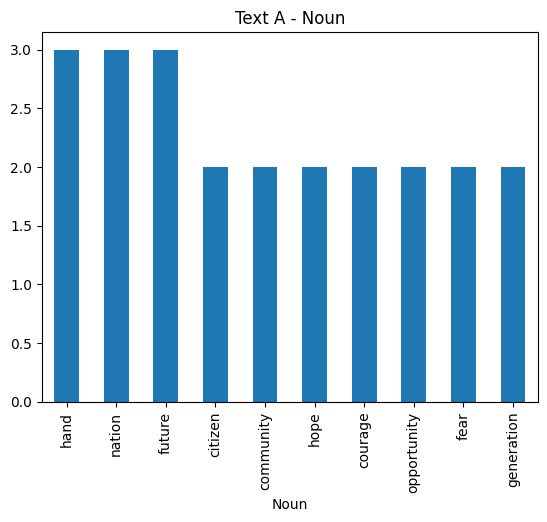


Text A - Verb:
       Verb  Frequency
0    build          4
1      let          4
2   choose          3
3    share          2
4   invest          2
5  empower          2
6   create          2
7   gather          1
8    unite          1
9    stand          1


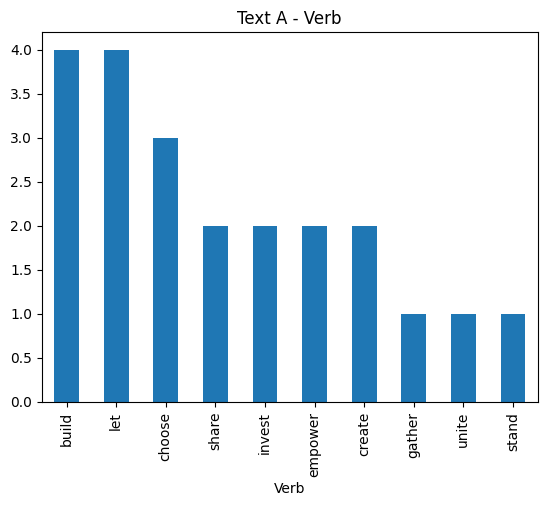


Text A - Adjective:
     Adjective  Frequency
0         new          2
1       other          2
2      fellow          1
3  unshakable          1
4       great          1
5         own          1
6         few          1
7      bright          1
8       young          1
9       clean          1


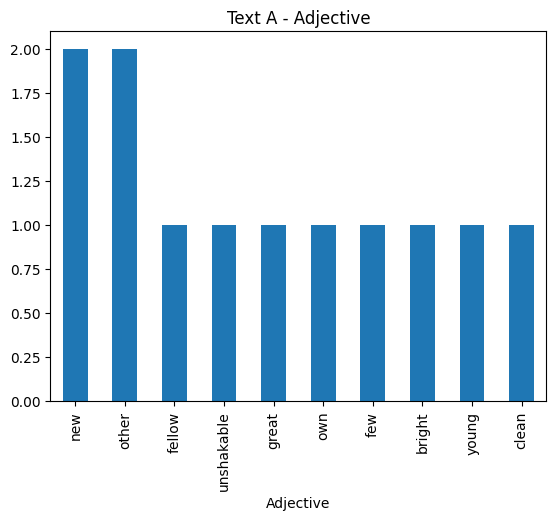


Text B - Noun:
        Noun  Frequency
0   freedom          3
1    threat          3
2    border          3
3   citizen          2
4    danger          2
5     value          2
6  security          2
7   resolve          2
8      fear          2
9    nation          2


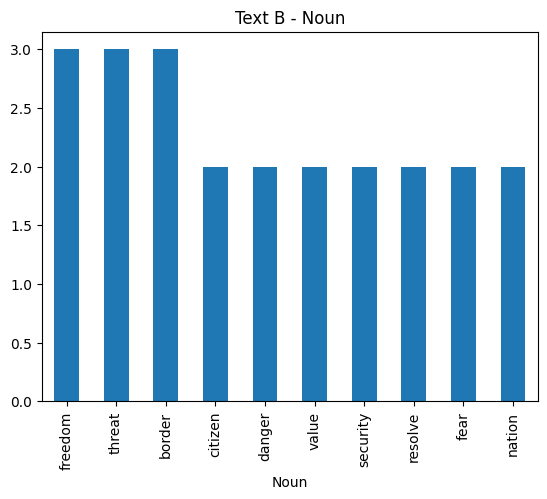


Text B - Verb:
        Verb  Frequency
0    ensure          4
1    refuse          3
2      face          2
3   protect          2
4      seek          2
5    divide          2
6       act          2
7    defend          2
8     stand          2
9  confront          2


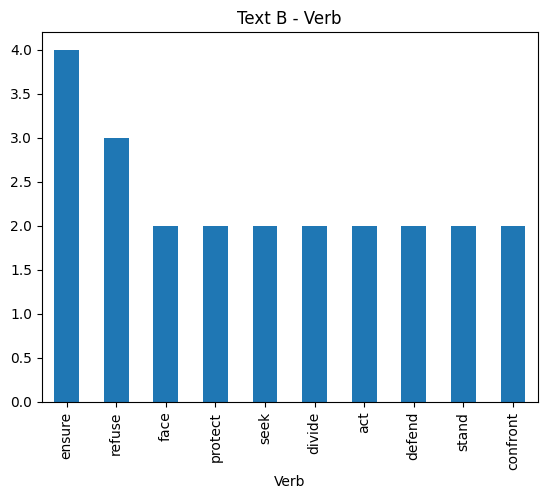


Text B - Adjective:
     Adjective  Frequency
0      fellow          1
1   uncertain          1
2        full          1
3       armed          1
4        firm          1
5        next          1
6     hostile          1
7        real          1
8  unwavering          1
9        safe          1


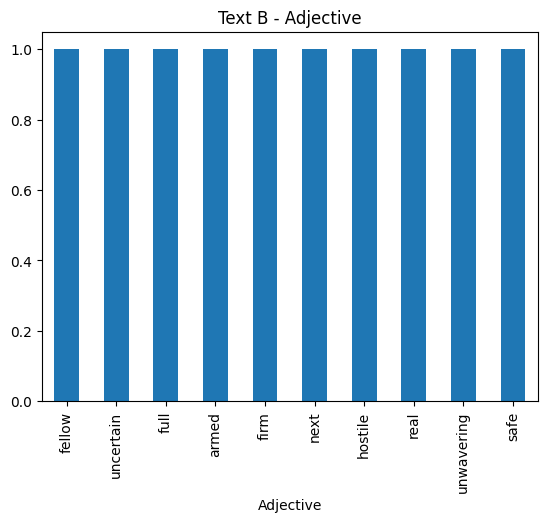

In [39]:
text_A = """My fellow citizens, today we gather not as strangers, but as a community united by our shared hopes and dreams.
We stand at the dawn of a new era—one built on innovation, cooperation, and the unshakable belief in the potential of our people.
The challenges before us are great, but so too is our courage and creativity.
We will invest in education, protect our planet, and empower every individual to shape their own destiny.

Let us build bridges, not walls; extend hands, not fists.
Together, we can create a nation where opportunity is not limited to the few, but shared by all.
Our strength lies not in fear, but in faith—in each other, in our values, and in the bright future we will create together.

Let this be the generation that chooses unity over division, progress over stagnation, and hope over despair.
Let this be the generation that dares to dream boldly, that embraces change, and that lifts one another up rather than tearing each other down.

We will work to expand access to healthcare, to ensure that no family has to choose between medicine and food.
We will support our teachers, invest in our children, and build schools that prepare every young mind for the world of tomorrow.
We will encourage clean energy, sustainable development, and responsible stewardship of the natural resources entrusted to us.

And above all, we will choose compassion—compassion for our neighbors, for our communities, and for those whose voices too often go unheard.
Our nation is strongest when every citizen feels seen, valued, and empowered.

Together, we will write a new chapter in our nation’s story—one defined not by fear or division, but by courage, unity, and purpose.
A future filled with opportunity is within our reach, and it is a future we will build hand in hand.
Let us move forward with confidence, with optimism, and with unwavering hope in all that we can achieve—together.
"""

text_B = """My fellow citizens, the world we face today is uncertain and full of danger.
Across the globe, our values are challenged, our security is tested, and our freedom is under threat.
We cannot afford complacency or hesitation.
We must strengthen our defenses, protect our borders, and ensure the safety of our families and our future.

Our enemies seek to divide us, to weaken our resolve, and to spread fear and chaos.
But we will not yield.
We will act with determination, discipline, and strength.
Every citizen has a role to play in defending our nation and preserving our way of life.

We must increase our vigilance, enhance our intelligence capabilities, and give our armed forces the tools they need to counter every threat.
We must stand firm against those who wish to undermine our democracy, whether they act from within or from beyond our borders.

Let us face the challenges before us with courage, and together ensure that the next generation inherits not fear, but freedom—not weakness, but resilience.
We will confront extremism wherever it appears.
We will push back against hostile powers seeking to disrupt our alliances.
We will safeguard our economy from manipulation and ensure that our industries cannot be exploited by those who do not share our values.

The dangers we confront are real, and they are growing.
Cyberattacks, disinformation campaigns, and coordinated acts of aggression threaten our stability.
We cannot ignore these warnings; we must respond with unity and unwavering resolve.

We will reinforce our border security, support law enforcement, and empower our military to defend every inch of our homeland.
We will stand shoulder to shoulder, refusing to be intimidated, refusing to be divided, and refusing to surrender to forces that thrive on fear.

Together, we will ensure that our nation remains safe, strong, and unbroken.
We will rise to meet every threat, overcome every obstacle, and protect the sacred freedoms that define us.
This is our duty, our responsibility, and our promise to all who come after us.
"""


import spacy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

texts = {"Text A": text_A, "Text B": text_B}

def extract_top_pos(text, n=10):
    doc = nlp(text)
    pos_dict = {
        "Noun": [t.lemma_.lower() for t in doc if t.pos_=="NOUN" and t.is_alpha],
        "Verb": [t.lemma_.lower() for t in doc if t.pos_=="VERB" and t.is_alpha],
        "Adjective": [t.lemma_.lower() for t in doc if t.pos_=="ADJ" and t.is_alpha]
    }
    return {pos: Counter(words).most_common(n) for pos, words in pos_dict.items()}

results = {name: extract_top_pos(text) for name, text in texts.items()}

def plot_and_print(name, data):
    for pos, items in data.items():
        df = pd.DataFrame(items, columns=[pos, "Frequency"])
        print(f"\n{name} - {pos}:\n", df)
        df.plot(kind="bar", x=pos, y="Frequency", legend=False, title=f"{name} - {pos}")
        plt.show()

for name, data in results.items():
    plot_and_print(name, data)
